<a href="https://colab.research.google.com/github/ahozdemir/yapaysiniraglari/blob/main/NN_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maskeli ve Maskesiz resimlerin github'dan çekilip loca'e kayıt edilmesi, ardından gerekli kütüphanelerin yüklenmesi yapıldı


In [2]:
!git clone https://github.com/prajnasb/observations
%cd /content/observations/experiements/data

import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.applications import DenseNet121

from tensorflow.keras.utils import plot_model

Cloning into 'observations'...
remote: Enumerating objects: 1638, done.
remote: Total 1638 (delta 0), reused 0 (delta 0), pack-reused 1638 (from 1)
Receiving objects: 100% (1638/1638), 75.94 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/observations/experiements/data


Dizin'de bulunan kütüphneler listelendi

In [3]:
%ls

with_mask/  without_mask/


Resimlerden Maskeli ve Maskesiz olanlara air birkaç örnek resim çıktısı gösterildi

with_mask/  without_mask/
with_mask
without_mask


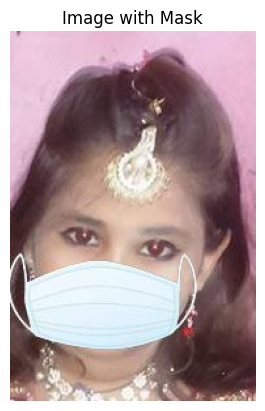

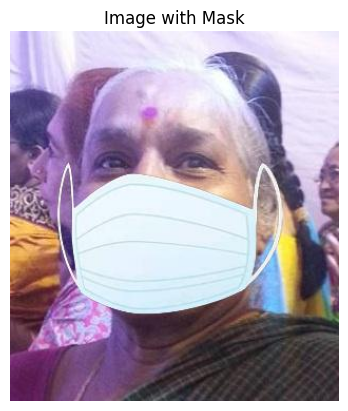

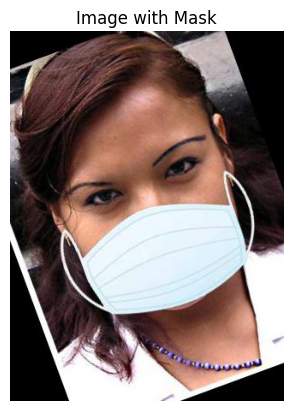

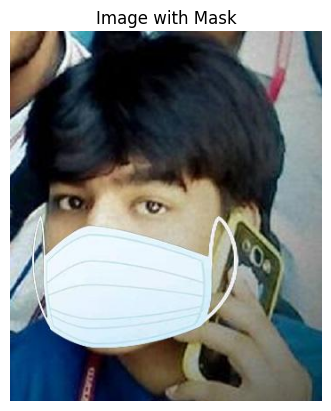

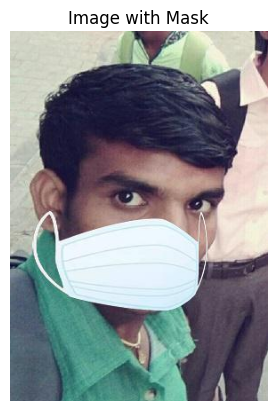

In [4]:
data_with_mask_dir = 'with_mask'
data_without_mask_dir = 'without_mask'
%ls
print(data_with_mask_dir)
print(data_without_mask_dir)

data_with_mask= os.listdir(data_with_mask_dir)[:5]
data_without_mask= os.listdir(data_without_mask_dir)[:5]

for img_file in data_with_mask:
    img_path = os.path.join(data_with_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Image with Mask')
    plt.axis('off')
    plt.show()

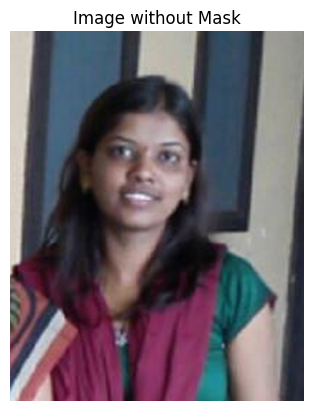

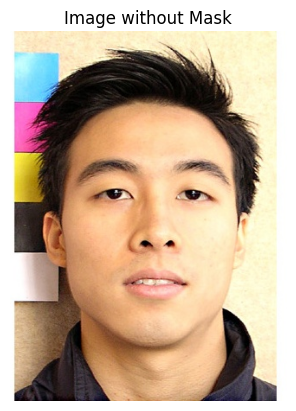

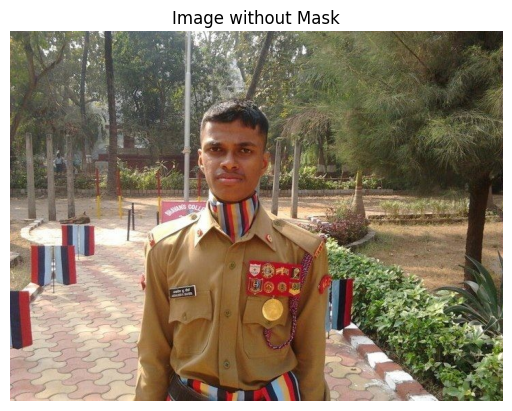

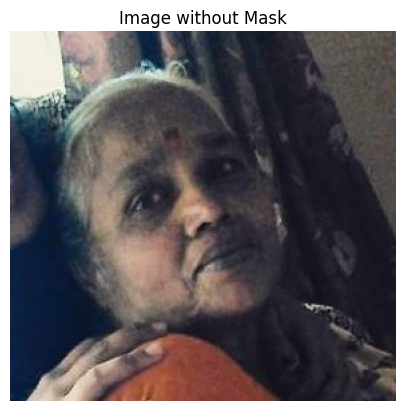

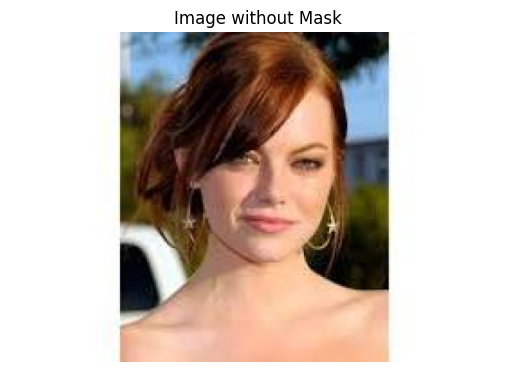

In [5]:

for img_file in data_without_mask:
    img_path = os.path.join(data_without_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Image without Mask')
    plt.axis('off')
    plt.show()

Maskeli ve maskesiz resim data'ları label' edildi

In [6]:
data_with_mask= os.listdir(data_with_mask_dir)
data_without_mask= os.listdir(data_without_mask_dir)
print('Number of without mask images:', len(data_without_mask))
print('Number of with mask images:', len(data_with_mask))

with_mask_labels = [1]*len(data_with_mask)
print(f"With Mask labels" ,with_mask_labels[0:10])

without_mask_labels = [0]*len(data_without_mask)
print(f"Without Mask Labels", without_mask_labels[0:10])

Labels = with_mask_labels + without_mask_labels
print(f"Labels", Labels[0:10])
print(f"Labels", Labels[-10:])


Number of without mask images: 686
Number of with mask images: 690
With Mask labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without Mask Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Resimler resize edilerek 'RGB' eklenerek numpy dizisine dönüştürüldü 128x128 pixel olarak.

In [7]:



images = []
def load_images_from_folder(folder):

    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images

with_mask_images = load_images_from_folder('with_mask')
without_mask_images = load_images_from_folder('without_mask')

len(images)
images[0].shape


X = np.array(images)
Y = np.array(Labels)

print(X.shape)
print(Y.shape)

(1376, 128, 128, 3)
(1376,)


Veriler %20 test %80 eğitim verisi olarak ayrıldı ve scale edildi

In [8]:


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")




X_train = X_train/255
X_test = X_test/255

Shape of X_train is: (1100, 128, 128, 3)
Shape of Y_train is: (1100,)

Shape of X_test is: (276, 128, 128, 3)
Shape of Y_test is: (276,)


Base model DenseNet121 Kullanılarak imaget ağırlıkları eklendi, bu ağın sonuna 256,128,64 ve son olarak da 2 nöronluk katmanlar eklendi, drop out olarak %20 lik değerler klullanıldı. Optimzier olarak Adam learning_rate baslangıcı olarak da 0,001 seçildi, ek olarak Earlystop ve ReduceLRO eklendi, ve model çıktısının özeti yazıdırıldı

In [9]:



from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)

base_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
     input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation ='relu'),
    Dropout(rate=0.2),

    Dense(2, activation ='sigmoid')

])



model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()





29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16384)               │          65,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,340,418 (43.26 MB)

 Trainable params: 11,223,234 (42.81 MB)

 Non-trainable params: 117,184 (457.75 KB)

Model eğitimi, Modeli eğitmeden önce Early stop ve reduce_learning rate fonksiyonları kullanılarak modele parametre olark verildi. 100 epoch olarak ayarladık ve her bir epoch da validataion ve train loss fonksiyon çıktıları gösterildi.

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.8641 - loss: 0.3351 - val_accuracy: 0.6091 - val_loss: 2.1491 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9883 - loss: 0.0406 - val_accuracy: 0.9545 - val_loss: 0.1283 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9953 - loss: 0.0176 - val_accuracy: 0.9909 - val_loss: 0.0147 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9998 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9946 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 5.9200e-04 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9958 - loss: 0.008

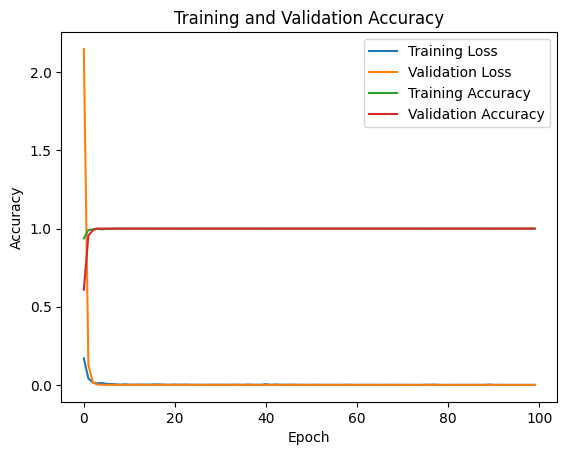

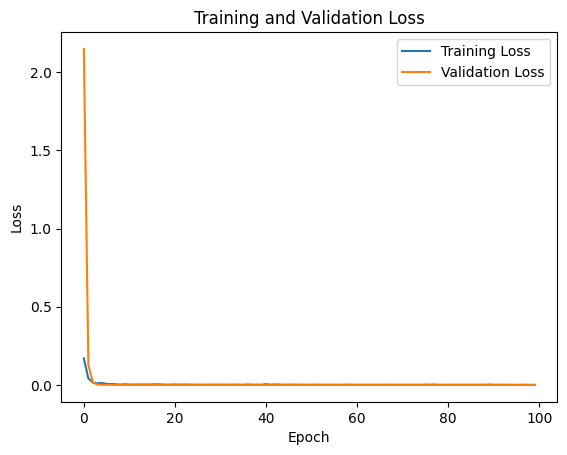

In [10]:


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=100, validation_split=0.1, callbacks=[reduce_lr, early_stop])


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Modelin değerlendirilmesinde ,  accucacy, f1 score ve recall, precision sonucları yazdırıldı.

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9904 - loss: 0.0662
Test Accuracy = 0.9927536249160767
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       138
           1       0.99      1.00      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



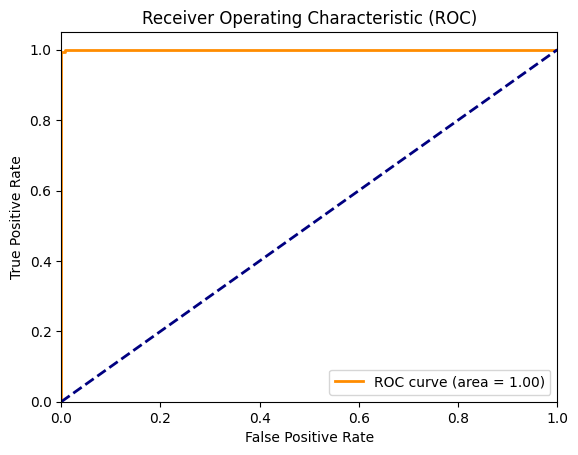

In [11]:
from sklearn.metrics import roc_curve, auc

loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)



from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:, 1])
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))





roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





Confusion Matrix grafiği çizdirildi ve yazdırıldı.

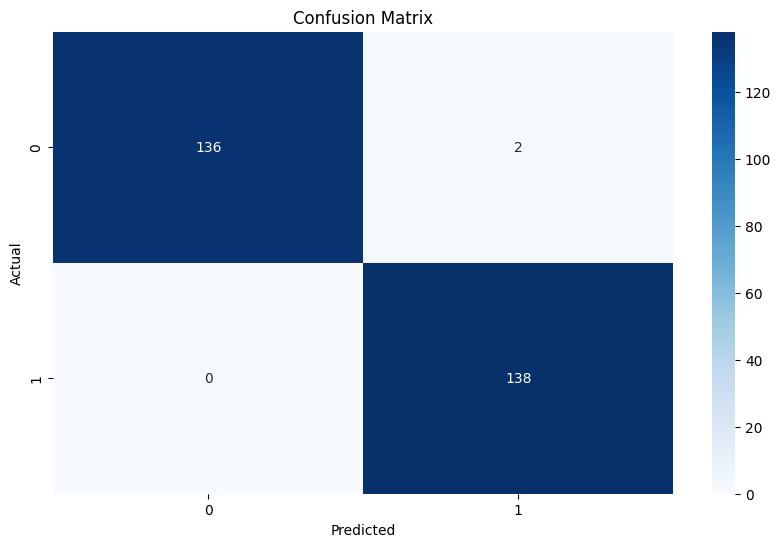

In [12]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Yapılan model test edilerek  rastgele seçilen 10 resmin maskeli mi maskesiz mi olduğuna dair tahmin etmesi sağlanarak sonuç ve resimleri ile birlikte yazıdırıldı.

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


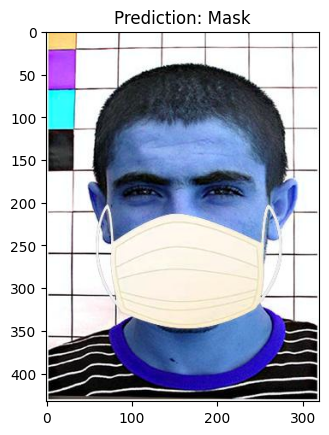

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


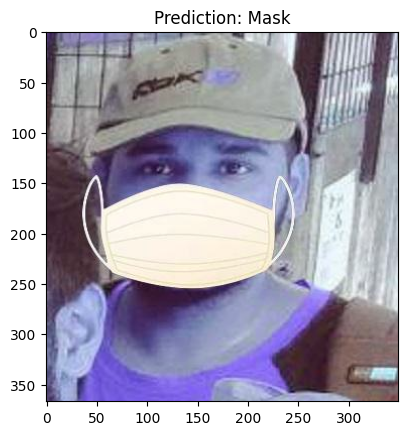

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


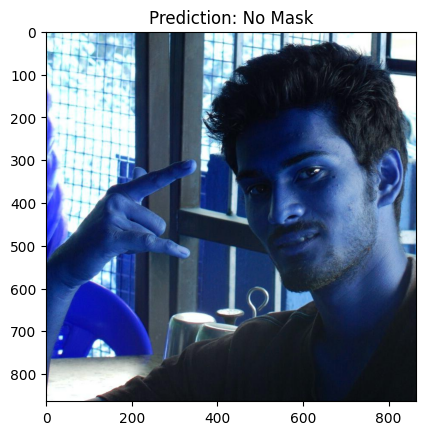

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


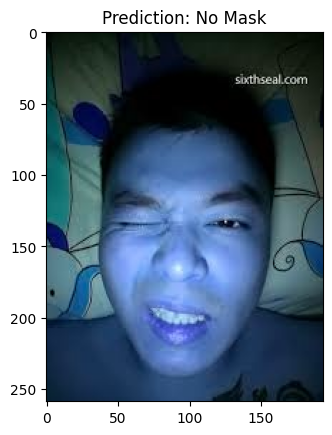

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


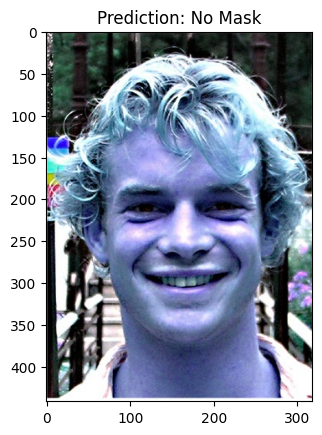

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


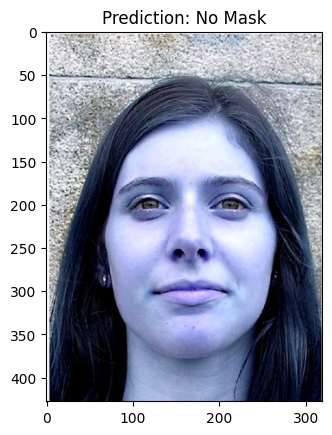

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


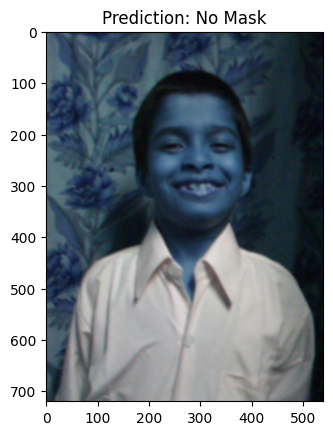

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


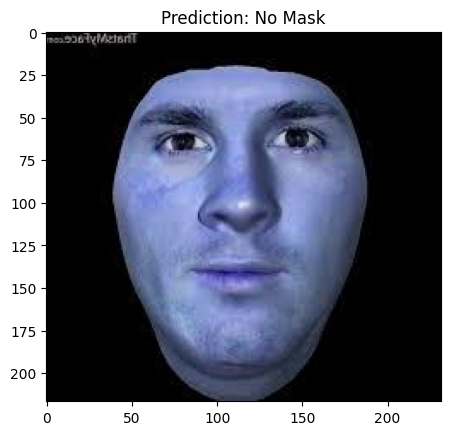

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


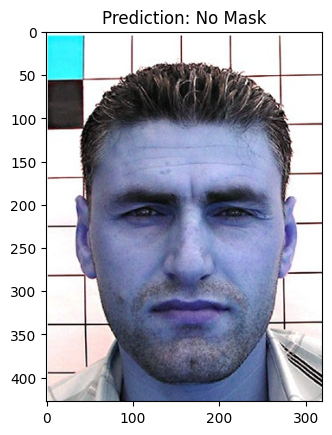

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


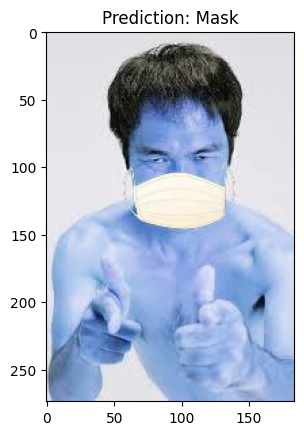

In [13]:

import random
dataset_path = '/content/observations/experiements/data'


def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (128, 128))
    image_scaled = image_resized / 255
    image_reshaped = np.reshape(image_scaled, [1, 128, 128, 3])
    return image_reshaped


all_image_files = []
for folder in ['with_mask', 'without_mask']:
    folder_path = os.path.join(dataset_path, folder)
    all_image_files.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path)])


random_images = random.sample(all_image_files, 10)

for image_path in random_images:
    input_image_reshaped = preprocess_image(image_path)
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)


    input_image = cv2.imread(image_path)
    plt.imshow(input_image)
    plt.title(f"Prediction: {'Mask' if input_pred_label == 1 else 'No Mask'}")
    plt.show()